In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd
#Load data into data frame & print 10 random rows
iris_df = pd.read_csv("Iris_external.csv")
iris_df.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
32,5.2,4.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
36,5.5,3.5,1.3,0.2,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
#Check for Nan. 
iris_df.isna().sum()
# result shows that there are no missing values. Hence nothing requires replacement with median.


Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [4]:
#Definition to convert categories to numerics.
def Class_to_numeric(x):
    if x=='Iris-setosa':
        return 0
    if x=='Iris-versicolor':
        return 1
    if x=='Iris-virginica':
        return 2
    
    
iris_df["Class_num"] = iris_df['Class'].apply(Class_to_numeric)
iris_df = iris_df.drop("Class",axis=1)
iris_df


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [5]:
corr = iris_df.corr()

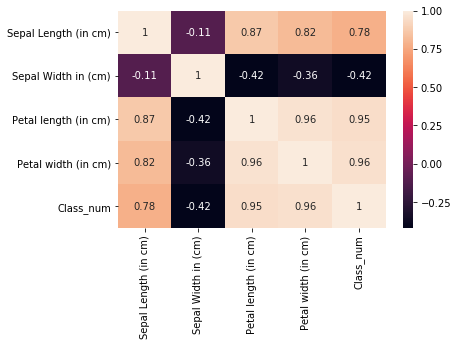

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(corr, annot=True)

# Sepal Width in (cm) is having a corr of -0.42 with the target variable Class_num. So, dropping the Sepal width from data frame.

iris_df_dropped = iris_df.drop("Sepal Width in (cm)", axis = 1)

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [7]:
var = iris_df_dropped.var()
var

# Each independent variable seem to be having significant variance within. So, no variables dropped. 

Sepal Length (in cm)    0.685694
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class_num               0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

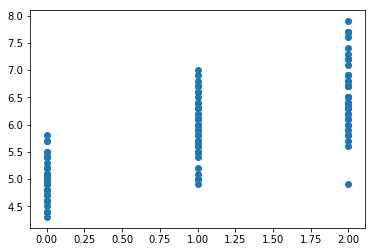

In [8]:
# Scatter plot for Sepal Length against class
plt.scatter(x=iris_df_dropped["Class_num"],y=iris_df_dropped["Sepal Length (in cm)"])

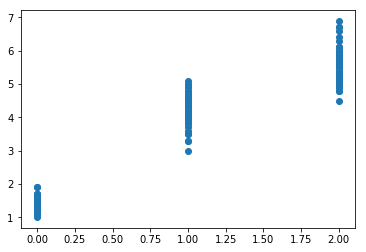

In [9]:
# Scatter plot for Petal Length against class
plt.scatter(x=iris_df_dropped["Class_num"],y=iris_df_dropped["Petal length (in cm)"])

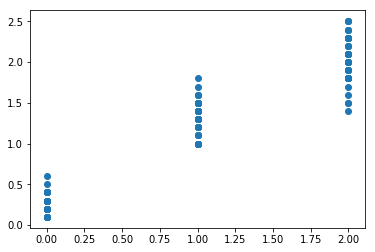

In [10]:
# Scatter plot for Petal Width against class
plt.scatter(x=iris_df_dropped["Class_num"],y=iris_df_dropped["Petal width (in cm)"])

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [11]:
from sklearn.model_selection import train_test_split
# Copy all the predictor variables into X dataframe. Since 'Class_num' is dependent variable drop it
X = iris_df_dropped.drop('Class_num', axis=1)

# Copy the 'Class_num' column alone into the y dataframe. This is the dependent variable
Y = iris_df_dropped["Class_num"]
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [12]:

# KNN 
from sklearn.neighbors import KNeighborsClassifier
k = [3,5,9]
for i in k:
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    print("accuracy score with k =", i, "is",NNH.score(X_test, Y_test))

accuracy score with k = 3 is 1.0
accuracy score with k = 5 is 1.0
accuracy score with k = 9 is 0.9666666666666667


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:

k = [1,3,5,7,9,11,13,15,17,19]
MSE = []
for i in k:
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    NNH.fit(X_train, Y_train)
    predicted_labels = NNH.predict(X_test)
    print("accuracy score with k =", i, "is",NNH.score(X_test, Y_test))
    print("MSE with k =", i, "is",1-NNH.score(X_test, Y_test))
    MSE.append(1-NNH.score(X_test, Y_test))
    print(MSE)
    
    
# There are multiple models with lowest MSE i.e 0. where k = 1,3,5,7,11. 

accuracy score with k = 1 is 1.0
MSE with k = 1 is 0.0
[0.0]
accuracy score with k = 3 is 1.0
MSE with k = 3 is 0.0
[0.0, 0.0]
accuracy score with k = 5 is 1.0
MSE with k = 5 is 0.0
[0.0, 0.0, 0.0]
accuracy score with k = 7 is 1.0
MSE with k = 7 is 0.0
[0.0, 0.0, 0.0, 0.0]
accuracy score with k = 9 is 0.9666666666666667
MSE with k = 9 is 0.033333333333333326
[0.0, 0.0, 0.0, 0.0, 0.033333333333333326]
accuracy score with k = 11 is 1.0
MSE with k = 11 is 0.0
[0.0, 0.0, 0.0, 0.0, 0.033333333333333326, 0.0]
accuracy score with k = 13 is 0.9666666666666667
MSE with k = 13 is 0.033333333333333326
[0.0, 0.0, 0.0, 0.0, 0.033333333333333326, 0.0, 0.033333333333333326]
accuracy score with k = 15 is 0.9666666666666667
MSE with k = 15 is 0.033333333333333326
[0.0, 0.0, 0.0, 0.0, 0.033333333333333326, 0.0, 0.033333333333333326, 0.033333333333333326]
accuracy score with k = 17 is 0.9666666666666667
MSE with k = 17 is 0.033333333333333326
[0.0, 0.0, 0.0, 0.0, 0.033333333333333326, 0.0, 0.033333333333

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

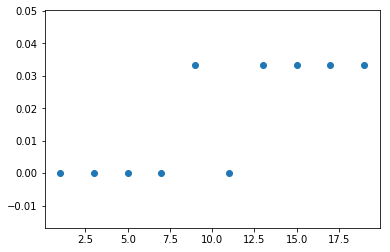

In [14]:
plt.scatter(x=k,y= MSE)


# Naive Bayes with Iris Data

In [15]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [16]:
#Re using data frame isris_df. This has categorical value changed to numeric value.

array = iris_df.values

X = array[:,0:4]
Y = array[:,4]

#Check the dataset
print(Y)
print(X)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

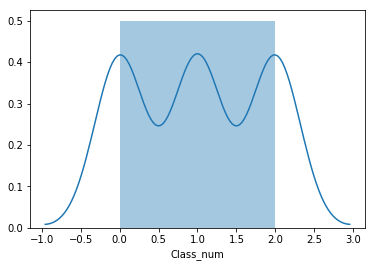

In [17]:
# Use the corresponding numerical column Class_num
sns.distplot(iris_df.Class_num, kde=True)
#Take - away : There is an equal distribution of observation in the data set for each class / category. 


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

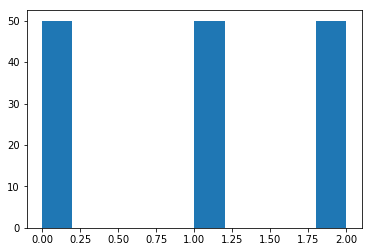

In [18]:
plt.hist(iris_df.Class_num)

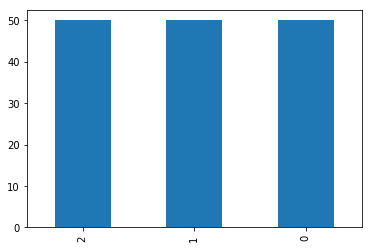

In [19]:
iris_df['Class_num'].value_counts().plot(kind='bar')

In [20]:
#Drop Id variable from data
# There is no ID column in the data set. So, this step is not valid.

### Question 12 
Find Correlation among all variables and give your insights 

In [21]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Class_num
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
5,5.4,3.9,1.7,0
6,4.6,3.4,1.4,0
7,5.0,3.4,1.5,0
8,4.4,2.9,1.4,0
9,4.9,3.1,1.5,0


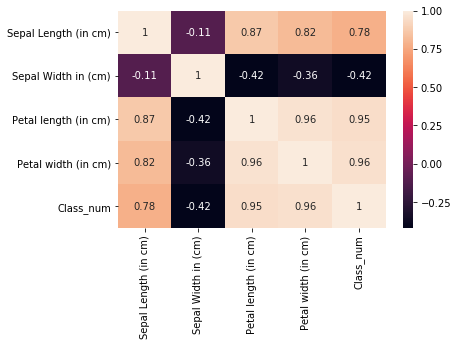

In [30]:
corre = iris_df.corr()
sns.heatmap(corre,annot=True)
corre
# By looking at the heatmap of correlation matrix, concluding following things. 
# 1. Petal length & petal width are highly co related(0.96). Meaning higher the petal length , higher is the petal width tendency. So, dropping Petal width. 

iris_df_naive = iris_df.drop("Petal width (in cm)",axis=1)
iris_df_naive

### Split data in Training and test set in 80:20.

In [54]:
from sklearn.model_selection import train_test_split
# Copy all the predictor variables into X dataframe. Since 'Class_num' is dependent variable drop it
X = iris_df_naive.drop('Class_num', axis=1)

# Copy the 'Class_num' column alone into the y dataframe. This is the dependent variable
Y = iris_df_naive["Class_num"]
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=1)

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

# Is there a need to do feature scaling as all features in the data set are on a similar scale ???



### Question 14 
Train and Fit NaiveBayes Model

In [61]:
#Fit the model
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn import metrics

model = GaussianNB()
model.fit(X_train, Y_train)
Acc_score = model.score(X_test,Y_test)
print("Accuracy score =",Acc_score)


Accuracy score = 0.9333333333333333


In [60]:
#Predict & # show accuracy
Ypredict = model.predict(X_test)
model_score = metrics.accuracy_score(Y_test,Ypredict)
print(model_score)

0.9333333333333333


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [62]:
# show Confusion Matrix

#Show precision and Recall metrics

print(metrics.classification_report(Y_test, Ypredict))
print(metrics.confusion_matrix(Y_test, Ypredict))

# Findings
#1. This model has low recall for Iris-versicolor classification compared to other two. 
#2. Precision - Ability to predict / correctness of prediction for Iris-virginica is 75%. where as for other two its 100%.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

   micro avg       0.93      0.93      0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [ ]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [ ]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 